In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

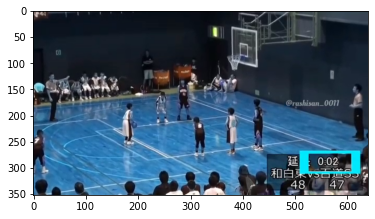

In [44]:
cap = cv2.VideoCapture('G:/Redmi Note4/Basket ball.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow("Inter", frame)
    
    if cv2.waitKey(40)==27:
        break

cv2.destroyAllWindows()
cap.release()
plt.imshow(frame)

In [43]:
cap = cv2.VideoCapture('G:/Redmi Note4/Basket ball.mp4')

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)          # here calculated difference in two frames
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)        # converted image into gray scale
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)  # 2 variablrs---> _ and thresh, we are not going to use _.
    dilated = cv2.dilate(thresh, None, iterations = 3)
    
    # Now we are going to find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # NOW WE WILL DRAW CONTOURS
    cv2.drawContours(frame1, contours, -1, (0,255,0), 2)      # we want contours on original frame1
                                                              # contourid = -1, to apply all the contours
    cv2.imshow("Feed", frame1)
    
    # Now we are assigning value inside frame2 into frame1
    frame1 = frame2
    # then inside frame2, we are going to read a new value 
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40)==27:
        break
cv2.destroyAllWindows()
cap.release()
